# Note:
- Pham:
  * I don't focus on too much on exploration (visualization). Someone needs to do more exploration.
  * I just tried building a ML model (Logistic Regression) to do sentiment analysis.

In [17]:
import json

In [18]:
with open('Appliances.jsonl', 'r') as f:
    appliances = [json.loads(line) for line in f]

In [19]:
import pandas as pd
df = pd.DataFrame(appliances)

In [20]:
df

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Work great,work great. use a new one every month,[],B01N0TQ0OH,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1519317108692,0,True
1,5.0,excellent product,Little on the thin side,[],B07DD2DMXB,B07DD37QPZ,AHWWLSPCJMALVHDDVSUGICL6RUCA,1664746863446,0,True
2,5.0,Happy customer!,"Quick delivery, fixed the issue!",[],B082W3Z9YK,B082W3Z9YK,AHZIJGKEWRTAEOZ673G5B3SNXEGQ,1607225435363,0,True
3,5.0,Amazing value,I wasn't sure whether these were worth it or n...,[],B078W2BJY8,B078W2BJY8,AFGUPTDFAWOHHL4LZDV27ERDNOYQ,1534104184306,0,True
4,5.0,Dryer parts,Easy to install got the product expected to re...,[],B08C9LPCQV,B08C9LPCQV,AELFJFAXQERUSMTXJQ6SYFFRDWMA,1620176603754,0,True
...,...,...,...,...,...,...,...,...,...,...
2128600,5.0,Accurate description,As described,[],B097948QRP,B097948QRP,AG6IN4MOTWF3743PKIPHYA2S7GXA,1627918432936,0,True
2128601,3.0,Not compatible with Nespresso U Machine,I have tried multiple times with different reu...,[],B072QVZYDD,B0C6XG2JSG,AHVKX5FONDMQVOA7XLMPAH6EGZ2Q,1610912344350,0,True
2128602,5.0,Works with Sears Kenmore model 36275585891,Exact fit for Sears Kenmore model 36275585891....,[],B07QKBMPG2,B07QKBMPG2,AEYETSNK5VL6ZSLN32EE6VCOAYFA,1577986736721,1,True
2128603,5.0,Perfect little ice maker!,Love this!! It doesn’t keep the ice cold but t...,[],B07H7SGQ52,B07H7SGQ52,AHIJLNIXWVFQFWJV3OGGQOHONGMQ,1580267673035,0,True


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128605 entries, 0 to 2128604
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   rating             float64
 1   title              object 
 2   text               object 
 3   images             object 
 4   asin               object 
 5   parent_asin        object 
 6   user_id            object 
 7   timestamp          int64  
 8   helpful_vote       int64  
 9   verified_purchase  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 148.2+ MB


In [22]:
df['rating'] = df['rating'].astype('object')

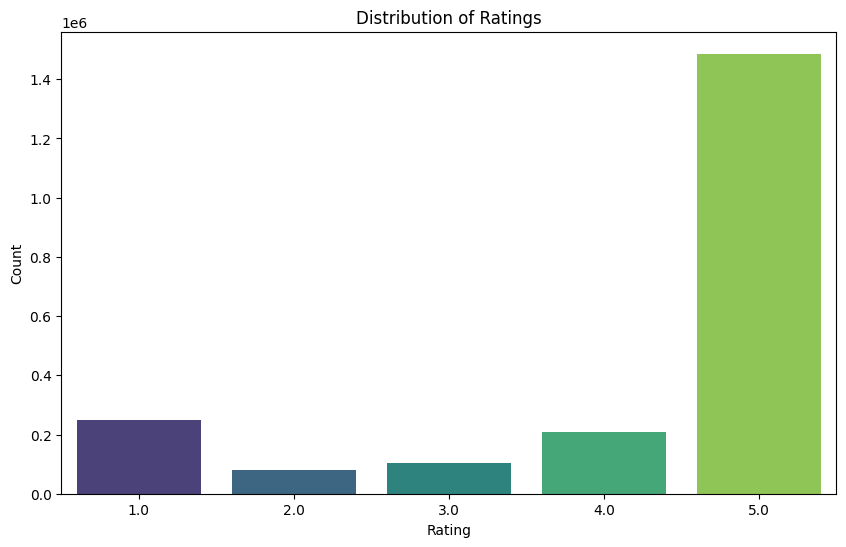

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [24]:
df.describe()

,timestamp,helpful_vote
count,2.128605e+06,2.128605e+06
mean,1.562042e+12,9.288868e-01
std,8.599971e+10,1.252679e+01
min,9.723118e+11,0.000000e+00
25%,1.502125e+12,0.000000e+00
50%,1.578968e+12,0.000000e+00
75%,1.629038e+12,0.000000e+00
max,1.694536e+12,5.704000e+03


In [33]:
# Distribution of the number of reviews per product
reviews_per_product = df['asin'].value_counts().reset_index()
reviews_per_product.columns = ['product_id', 'num_reviews']
reviews_per_product = reviews_per_product.sort_values(by='num_reviews', ascending=True)

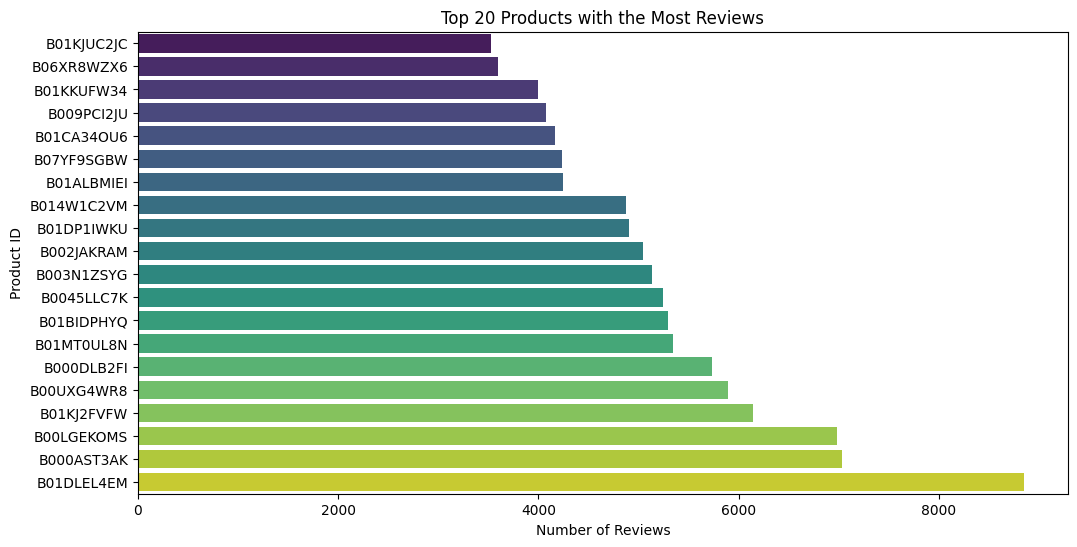

In [34]:
# Get top 20 products
top_20_products = reviews_per_product.tail(20)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_products, x='num_reviews', y='product_id', palette='viridis')
plt.title('Top 20 Products with the Most Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Product ID')
plt.show()

In [36]:
reviews_per_user = df['user_id'].value_counts().reset_index()
reviews_per_user.columns = ['user_id', 'num_reviews']
reviews_per_user = reviews_per_user.sort_values(by='num_reviews', ascending=True)

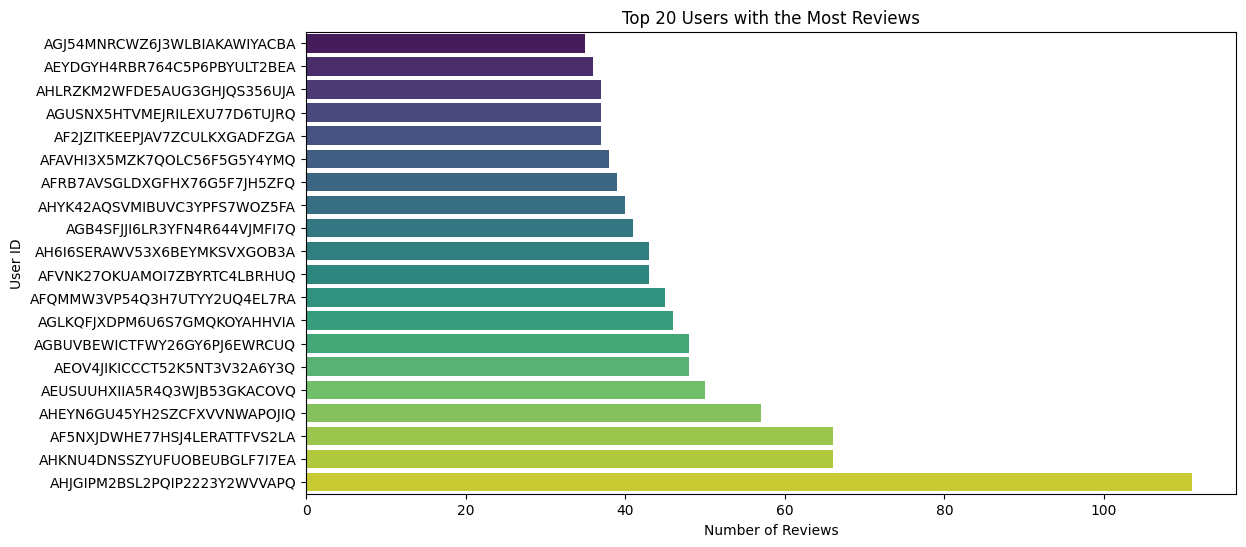

In [37]:
# Get top 20 users
top_20_users = reviews_per_user.tail(20)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_users, x='num_reviews', y='user_id', palette='viridis')
plt.title('Top 20 Users with the Most Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID')
plt.show()

In [41]:
# Get good reviews text 4 and 5
good_reviews = df[df['rating'].isin([4, 5])]['text'].tolist()

# Get bad reviews text 1 and 2
bad_reviews = df[df['rating'].isin([1, 2])]['text'].tolist()

# Fair reviews text 3
fair_reviews = df[df['rating'] == 3]['text'].tolist()

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# nltk.download('punkt')
# nltk.download('stopwords')

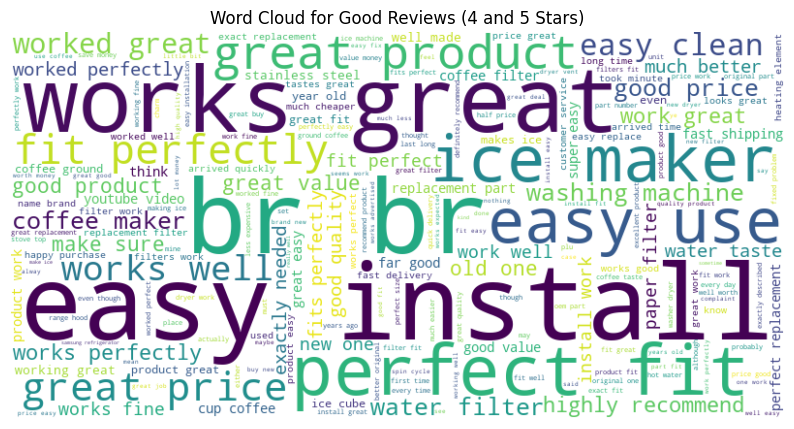

In [42]:
# Plot word cloud for good reviews
stop_words = set(stopwords.words('english'))
good_reviews_text = ' '.join(good_reviews)
good_reviews_tokens = word_tokenize(good_reviews_text.lower())
good_reviews_tokens = [word for word in good_reviews_tokens if word.isalpha() and word not in stop_words]
good_reviews_text = ' '.join(good_reviews_tokens)

wordcloud_good = WordCloud(width=800, height=400, background_color='white').generate(good_reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Good Reviews (4 and 5 Stars)')
plt.show()

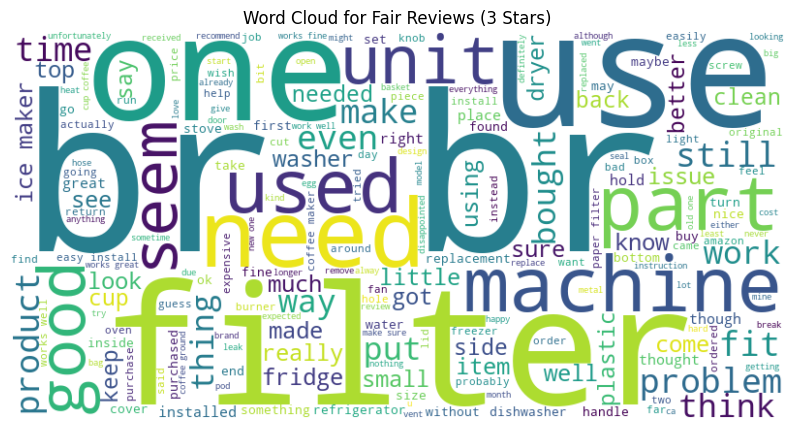

In [43]:
# Plot word cloud for fair reviews
fair_reviews_text = ' '.join(fair_reviews)
fair_reviews_tokens = word_tokenize(fair_reviews_text.lower())
fair_reviews_tokens = [word for word in fair_reviews_tokens if word.isalpha() and word not in stop_words]
fair_reviews_text = ' '.join(fair_reviews_tokens)

wordcloud_fair = WordCloud(width=800, height=400, background_color='white').generate(fair_reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fair, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fair Reviews (3 Stars)')
plt.show()

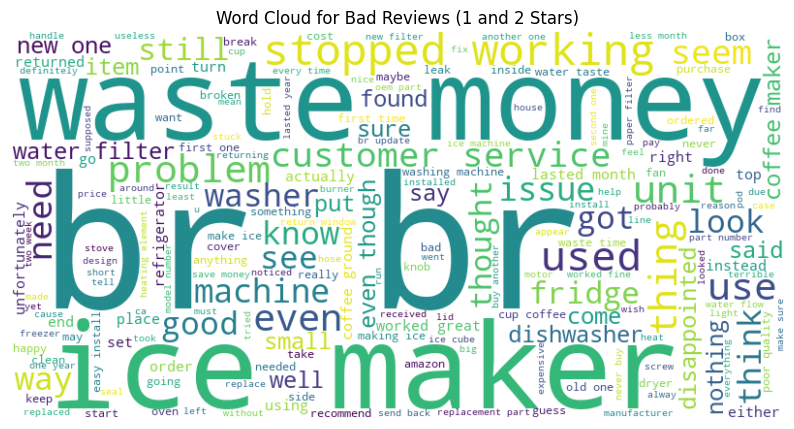

In [44]:
# Plot word cloud for bad reviews
bad_reviews_text = ' '.join(bad_reviews)
bad_reviews_tokens = word_tokenize(bad_reviews_text.lower())
bad_reviews_tokens = [word for word in bad_reviews_tokens if word.isalpha() and word not in stop_words]
bad_reviews_text = ' '.join(bad_reviews_tokens)

wordcloud_bad = WordCloud(width=800, height=400, background_color='white').generate(bad_reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Bad Reviews (1 and 2 Stars)')
plt.show()

## Build ML models for sentiment analysis

In [46]:
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x in [4, 5] else ('neutral' if x == 3 else 'negative'))

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df['text']
y = df['sentiment']

# Split the data into training and testing sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [52]:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.78      0.77      0.78     99035
     neutral       0.37      0.07      0.11     31214
    positive       0.93      0.97      0.95    508333

    accuracy                           0.90    638582
   macro avg       0.69      0.60      0.61    638582
weighted avg       0.87      0.90      0.88    638582

Accuracy: 0.8972097553642289


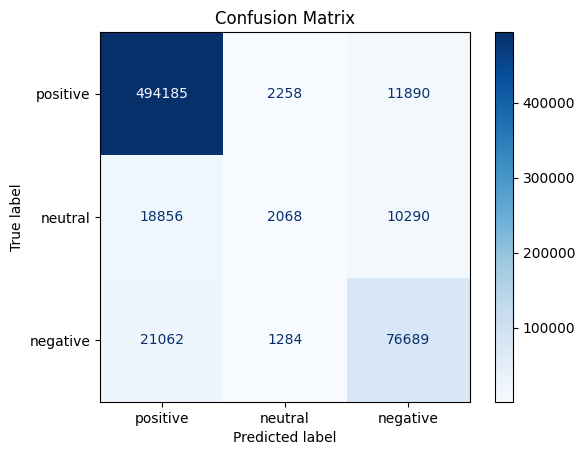

In [53]:
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'neutral', 'negative'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()